<a href="https://colab.research.google.com/github/Arati930/codtech_tasks/blob/main/Task2_ML_Predictive_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Install required ML packages
!pip install -q scikit-learn pandas matplotlib seaborn


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:

# Load built-in iris dataset from seaborn
iris = sns.load_dataset('iris')
print(iris.head())

# Encode target variable
iris['species'] = iris['species'].astype('category').cat.codes

X = iris.drop('species', axis=1)
y = iris['species']


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (105, 4)
Testing shape: (45, 4)


In [5]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


Accuracy: 0.9111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



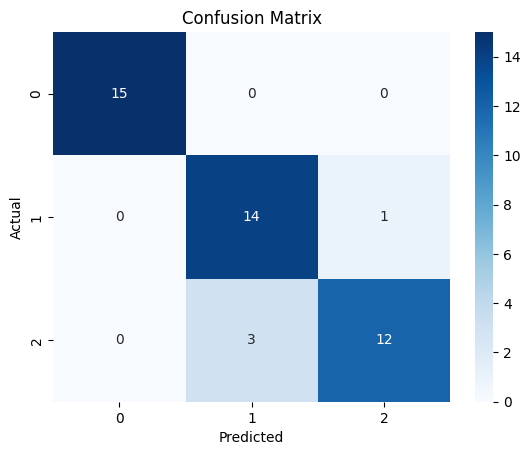

In [7]:

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:

with open("task2_summary.txt","w") as f:
    f.write("Task 2 - Predictive Analysis using Machine Learning\n")
    f.write(f"Model: Logistic Regression\n")
    f.write(f"Accuracy: {acc}\n")
    f.write("Classification Report:\n")
    f.write(cr)

print("Summary saved to task2_summary.txt")


Summary saved to task2_summary.txt
